In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Houli = df['SiteName'].isin(['后里']) #找后里測站
df[Houli].fillna(method='ffill') #填補NA值

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460338,461633,后里,臺中市,36.0,細懸浮微粒,良好,1.6,0.3,NaN,17,...,30.0,11.0,7.2,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460423,461718,后里,臺中市,35.0,細懸浮微粒,良好,1.6,0.3,NaN,15,...,29.0,11.0,6.5,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460443,461738,后里,臺中市,31.0,細懸浮微粒,良好,1.5,0.3,NaN,15,...,26.0,10.0,2.8,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460528,461823,后里,臺中市,31.0,細懸浮微粒,良好,2.1,0.3,NaN,16,...,25.0,10.0,4.6,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460620,461915,后里,臺中市,31.0,細懸浮微粒,良好,2.1,0.3,NaN,16,...,25.0,10.0,4.6,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460786,462081,后里,臺中市,32.0,細懸浮微粒,良好,2.4,0.3,NaN,18,...,24.0,10.0,4.3,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460867,462162,后里,臺中市,33.0,細懸浮微粒,良好,2.7,0.3,NaN,20,...,26.0,10.0,8.7,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461186,462481,后里,臺中市,33.0,細懸浮微粒,良好,3.0,0.2,NaN,25,...,24.0,10.0,6.0,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461272,462567,后里,臺中市,31.0,細懸浮微粒,良好,3.0,0.2,NaN,27,...,28.0,9.0,7.1,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461370,462665,后里,臺中市,30.0,細懸浮微粒,良好,3.5,0.2,NaN,28,...,31.0,9.0,7.2,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Houli = df['SiteName'].isin(['后里']) #找后里測站
Houli=df[Houli].drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column
Houli.drop([0, 1],inplace=True)
Houli.reset_index(drop=True,inplace=True)
Houli['pr']=''

Houli

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.3,15,26.0,10.0,2.8,
1,2.1,0.3,16,25.0,10.0,4.6,
2,2.1,0.3,16,25.0,10.0,4.6,
3,2.4,0.3,18,24.0,10.0,4.3,
4,2.7,0.3,20,26.0,10.0,8.7,
5,3.0,0.2,25,24.0,10.0,6.0,
6,3.0,0.2,27,28.0,9.0,7.1,
7,3.5,0.2,28,31.0,9.0,7.2,
8,6.0,0.3,29,36.0,9.0,8.5,
9,0.0,0.3,31,42.0,9.0,8.1,


In [5]:
cd4 = Houli['PM25'].isin(['0'])
Houli[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2,pr
37,0.0,0,0,0.0,0.0,8.2,
38,0.0,0,0,0.0,0.0,8.2,
39,0.0,0,0,0.0,0.0,8.2,
97,0.0,0,0,0.0,0.0,13.5,
98,0.0,0,0,0.0,0.0,13.5,
99,0.0,0,0,0.0,0.0,13.5,
100,0.0,0,0,0.0,0.0,13.5,
101,0.0,0,0,0.0,0.0,13.5,
102,0.0,0,0,0.0,0.0,13.5,
103,0.0,0,0,0.0,0.0,13.5,


In [6]:
Houli.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值


Houli

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.3,15,26.0,10.0,2.8,
1,2.1,0.3,16,25.0,10.0,4.6,
2,2.1,0.3,16,25.0,10.0,4.6,
3,2.4,0.3,18,24.0,10.0,4.3,
4,2.7,0.3,20,26.0,10.0,8.7,
5,3.0,0.2,25,24.0,10.0,6.0,
6,3.0,0.2,27,28.0,9.0,7.1,
7,3.5,0.2,28,31.0,9.0,7.2,
8,6.0,0.3,29,36.0,9.0,8.5,
9,NaN,0.3,31,42.0,9.0,8.1,


In [7]:
Houli.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Houli

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.3,15,26.0,10.0,2.8,
1,2.1,0.3,16,25.0,10.0,4.6,
2,2.1,0.3,16,25.0,10.0,4.6,
3,2.4,0.3,18,24.0,10.0,4.3,
4,2.7,0.3,20,26.0,10.0,8.7,
5,3.0,0.2,25,24.0,10.0,6.0,
6,3.0,0.2,27,28.0,9.0,7.1,
7,3.5,0.2,28,31.0,9.0,7.2,
8,6.0,0.3,29,36.0,9.0,8.5,
9,6.0,0.3,31,42.0,9.0,8.1,


In [8]:
cd4 = Houli['O3'].isin([0])
Houli[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2,pr


In [9]:
Houli.to_csv('Houlipollution.csv')

Houli

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.3,15,26.0,10.0,2.8,
1,2.1,0.3,16,25.0,10.0,4.6,
2,2.1,0.3,16,25.0,10.0,4.6,
3,2.4,0.3,18,24.0,10.0,4.3,
4,2.7,0.3,20,26.0,10.0,8.7,
5,3.0,0.2,25,24.0,10.0,6.0,
6,3.0,0.2,27,28.0,9.0,7.1,
7,3.5,0.2,28,31.0,9.0,7.2,
8,6.0,0.3,29,36.0,9.0,8.5,
9,6.0,0.3,31,42.0,9.0,8.1,


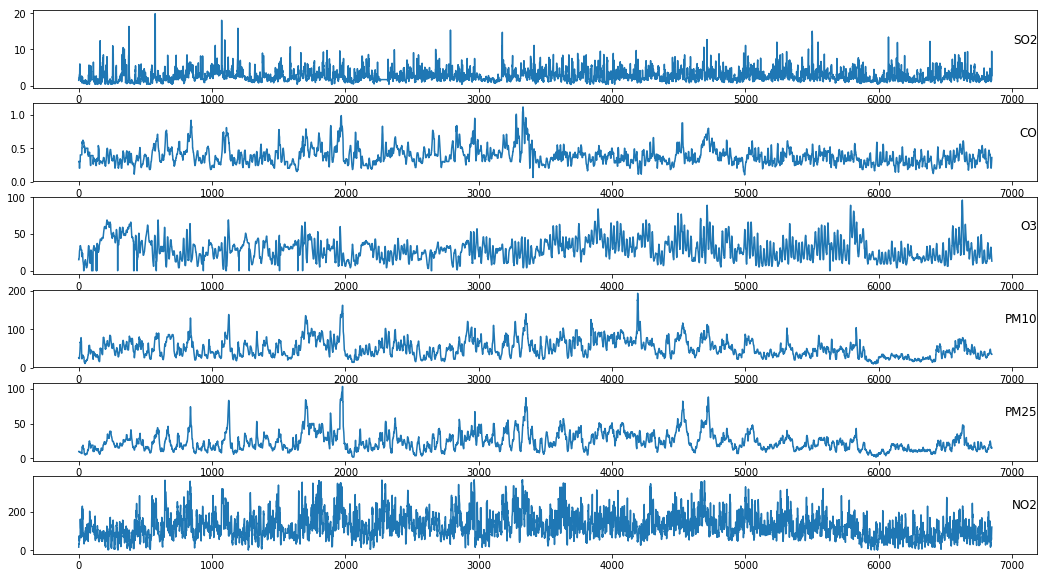

In [10]:
# load dataset
dataset =pd.read_csv('Houlipollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4, 5]
i=1
plt.figure(figsize=(18, 10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.30,15,26.0,10.0,2.8,NaN
1,2.1,0.30,16,25.0,10.0,4.6,NaN
2,2.1,0.30,16,25.0,10.0,4.6,NaN
3,2.4,0.30,18,24.0,10.0,4.3,NaN
4,2.7,0.30,20,26.0,10.0,8.7,NaN
5,3.0,0.20,25,24.0,10.0,6.0,NaN
6,3.0,0.20,27,28.0,9.0,7.1,NaN
7,3.5,0.20,28,31.0,9.0,7.2,NaN
8,6.0,0.30,29,36.0,9.0,8.5,NaN
9,6.0,0.30,31,42.0,9.0,8.1,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.718622,-0.669042,-0.996594,-1.074171,-1.076425,-1.722112,10.0
1,-0.373734,-0.669042,-0.928107,-1.117715,-1.076425,-1.438563,10.0
2,-0.373734,-0.669042,-0.928107,-1.117715,-1.076425,-1.438563,10.0
3,-0.201290,-0.669042,-0.791133,-1.161258,-1.076425,-1.485821,10.0
4,-0.028846,-0.669042,-0.654160,-1.074171,-1.076425,-0.792701,10.0
5,0.143599,-1.434183,-0.311726,-1.161258,-1.076425,-1.218025,10.0
6,0.143599,-1.434183,-0.174752,-0.987084,-1.151491,-1.044745,9.0
7,0.431006,-1.434183,-0.106265,-0.856453,-1.151491,-1.028992,9.0
8,1.868041,-0.669042,-0.037778,-0.638735,-1.151491,-0.824207,9.0
9,1.868041,-0.669042,0.099195,-0.377473,-1.151491,-0.887218,9.0


In [13]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X, Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
##X_train,Y_train=train_window(train_set_scaled,66,6)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
##X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
#X_train.shape

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
__________

5532/5532 [==============================] - 1s 200us/step - loss: 37.7089 - val_loss: 24.2111
Epoch 64/500
5532/5532 [==============================] - 1s 189us/step - loss: 39.3868 - val_loss: 23.6562
Epoch 65/500
5532/5532 [==============================] - 1s 161us/step - loss: 38.5467 - val_loss: 23.2747
Epoch 66/500
5532/5532 [==============================] - 1s 212us/step - loss: 38.8465 - val_loss: 23.6817
Epoch 67/500
5532/5532 [==============================] - 1s 247us/step - loss: 37.2858 - val_loss: 23.3169
Epoch 68/500
5532/5532 [==============================] - 1s 235us/step - loss: 39.1280 - val_loss: 23.9082
Epoch 69/500
5532/5532 [==============================] - 1s 234us/step - loss: 37.9531 - val_loss: 23.5737
Epoch 70/500
5532/5532 [==============================] - 1s 212us/step - loss: 38.8174 - val_loss: 23.2176
Epoch 71/500
5532/5532 [==============================] - 1s 196us/step - loss: 37.5541 - val_loss: 23.6254
Epoch 72/500
5532/5532 [=================

5532/5532 [==============================] - 2s 294us/step - loss: 33.8878 - val_loss: 19.9524
Epoch 139/500
5532/5532 [==============================] - 1s 265us/step - loss: 32.7066 - val_loss: 20.8229
Epoch 140/500
5532/5532 [==============================] - 2s 275us/step - loss: 32.1265 - val_loss: 20.6085
Epoch 141/500
5532/5532 [==============================] - 1s 266us/step - loss: 31.7674 - val_loss: 20.5038
Epoch 142/500
5532/5532 [==============================] - 1s 257us/step - loss: 34.8936 - val_loss: 20.2401
Epoch 143/500
5532/5532 [==============================] - 1s 253us/step - loss: 32.2408 - val_loss: 20.8184
Epoch 144/500
5532/5532 [==============================] - 2s 300us/step - loss: 33.2853 - val_loss: 20.9914
Epoch 145/500
5532/5532 [==============================] - 2s 303us/step - loss: 32.4107 - val_loss: 20.8026
Epoch 146/500
5532/5532 [==============================] - 1s 258us/step - loss: 32.2126 - val_loss: 19.9918
Epoch 147/500
5532/5532 [========

5532/5532 [==============================] - 2s 294us/step - loss: 30.0931 - val_loss: 17.8667
Epoch 214/500
5532/5532 [==============================] - 2s 302us/step - loss: 30.5317 - val_loss: 18.3226
Epoch 215/500
5532/5532 [==============================] - 2s 307us/step - loss: 28.6767 - val_loss: 18.3575
Epoch 216/500
5532/5532 [==============================] - 2s 299us/step - loss: 28.6421 - val_loss: 17.8678
Epoch 217/500
5532/5532 [==============================] - 2s 286us/step - loss: 29.1734 - val_loss: 17.8070
Epoch 218/500
5532/5532 [==============================] - 2s 282us/step - loss: 28.6153 - val_loss: 17.9587
Epoch 219/500
5532/5532 [==============================] - 1s 254us/step - loss: 29.1666 - val_loss: 17.7292
Epoch 220/500
5532/5532 [==============================] - 2s 291us/step - loss: 29.1240 - val_loss: 17.6678
Epoch 221/500
5532/5532 [==============================] - 2s 290us/step - loss: 28.5704 - val_loss: 17.8536
Epoch 222/500
5532/5532 [========

5532/5532 [==============================] - 1s 258us/step - loss: 26.9538 - val_loss: 15.8732
Epoch 289/500
5532/5532 [==============================] - 1s 266us/step - loss: 26.7114 - val_loss: 15.6000
Epoch 290/500
5532/5532 [==============================] - 1s 268us/step - loss: 25.8182 - val_loss: 15.7100
Epoch 291/500
5532/5532 [==============================] - 1s 259us/step - loss: 26.9703 - val_loss: 16.3745
Epoch 292/500
5532/5532 [==============================] - 1s 260us/step - loss: 26.2101 - val_loss: 16.0043
Epoch 293/500
5532/5532 [==============================] - 1s 257us/step - loss: 26.3237 - val_loss: 15.7222
Epoch 294/500
5532/5532 [==============================] - 2s 278us/step - loss: 26.2147 - val_loss: 15.3976
Epoch 295/500
5532/5532 [==============================] - 1s 242us/step - loss: 25.7446 - val_loss: 15.5010
Epoch 296/500
5532/5532 [==============================] - 1s 248us/step - loss: 26.5858 - val_loss: 15.6532
Epoch 297/500
5532/5532 [========

5532/5532 [==============================] - 1s 249us/step - loss: 24.4386 - val_loss: 14.0836
Epoch 364/500
5532/5532 [==============================] - 1s 259us/step - loss: 24.0140 - val_loss: 13.7696
Epoch 365/500
5532/5532 [==============================] - 1s 235us/step - loss: 24.4254 - val_loss: 14.2323
Epoch 366/500
5532/5532 [==============================] - 1s 259us/step - loss: 23.5750 - val_loss: 13.8220
Epoch 367/500
5532/5532 [==============================] - 2s 283us/step - loss: 23.8069 - val_loss: 14.3109
Epoch 368/500
5532/5532 [==============================] - 2s 273us/step - loss: 23.3154 - val_loss: 13.3038
Epoch 369/500
5532/5532 [==============================] - 1s 257us/step - loss: 23.9025 - val_loss: 13.5336
Epoch 370/500
5532/5532 [==============================] - 1s 245us/step - loss: 23.8583 - val_loss: 14.0901
Epoch 371/500
5532/5532 [==============================] - 1s 257us/step - loss: 23.3724 - val_loss: 13.5822
Epoch 372/500
5532/5532 [========

5532/5532 [==============================] - 1s 250us/step - loss: 22.6006 - val_loss: 13.2113
Epoch 439/500
5532/5532 [==============================] - 1s 248us/step - loss: 22.5923 - val_loss: 13.4690
Epoch 440/500
5532/5532 [==============================] - 1s 270us/step - loss: 23.2306 - val_loss: 12.9946
Epoch 441/500
5532/5532 [==============================] - 1s 251us/step - loss: 22.4750 - val_loss: 12.3498
Epoch 442/500
5532/5532 [==============================] - 1s 264us/step - loss: 22.5207 - val_loss: 12.7239
Epoch 443/500
5532/5532 [==============================] - 1s 262us/step - loss: 22.5510 - val_loss: 12.8016
Epoch 444/500
5532/5532 [==============================] - 2s 279us/step - loss: 21.8799 - val_loss: 12.5713
Epoch 445/500
5532/5532 [==============================] - 1s 257us/step - loss: 21.0096 - val_loss: 12.7656
Epoch 446/500
5532/5532 [==============================] - 1s 247us/step - loss: 21.8354 - val_loss: 12.6975
Epoch 447/500
5532/5532 [========

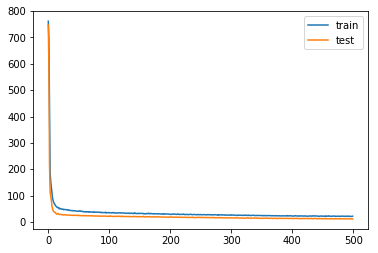

In [20]:
#model1
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)


def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel2(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Houlimodel.h5')
del model

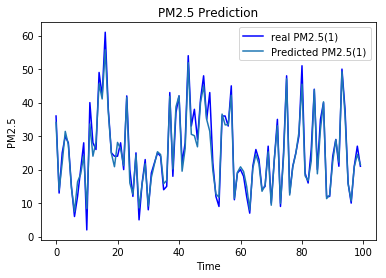

(683, 7)
(6147, 7)
(683, 7)
Train 0.5998047828208882
Validation 0.5636896046852123
1.587916676362169e+43
The R2 score on the Test set is:	0.930
Train Score: 3.06 RMSE
Test Score: 3.56 RMSE
The MSE   on the Test set is: 12.705425664298023
The RMSE  on the Test set is: 3.5644670940125147
The MAE   on the Test set is: 2.524271343472961
The MAPE  on the Test set is: 0.0206109691384472
The SMAPE on the Test set is: 0.018421636511266656


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In [21]:
#讀取model1
model = load_model('Houlimodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)



plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
print(testPredict.shape)
print(trainPredict.shape)
print(Y_val.shape)

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


# MAPE和SMAPE
def mape(y_true, y_pred):
    n = len(Y_val)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n * 100

def smape(y_true, y_pred):
    n = len(Y_val)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n * 100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

